# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [4]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


**Important: Restart the Kernel at this moment**

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
from torch.utils.data import DataLoader

In [4]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])## flatten the pixels to tensrs

# Create training set and define training dataloader
## YOUR CODE HERE ##
training_set = torchvision.datasets.MNIST(root = "data",train = True, download = True, transform = transform)
training_loader = DataLoader(training_set, batch_size = 64, shuffle = True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_set = torchvision.datasets.MNIST(root = "data",train = False, download = True, transform = transform)
test_loader = DataLoader(test_set, batch_size = 64, shuffle = False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

We need to convert pixels to tensors for necessary computations and normalizing ternsor vlues within 0 and 1 range prevents issues during training process by keeping values in stable rate.

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [6]:
#dimension of the data
images,labels = next(iter(training_loader))
print('image dimension:{}'.format(images.shape))
print('labels dimension:{}'.format(labels.shape))

image dimension:torch.Size([64, 1, 28, 28])
labels dimension:torch.Size([64])


1


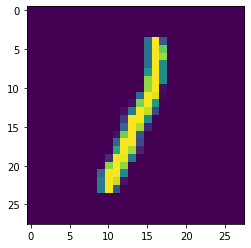

2


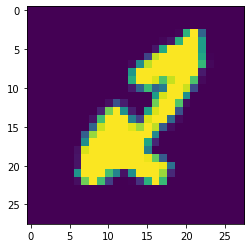

6


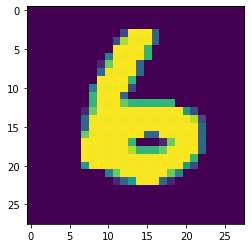

8


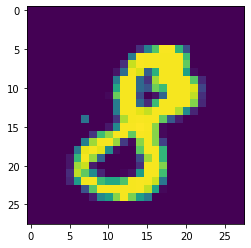

1


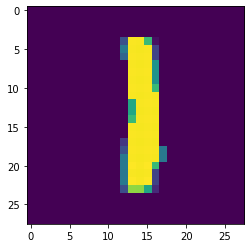

In [7]:
# Explore data
## YOUR CODE HERE ##
show5(training_loader)

In [8]:
print('length of train_data:{}'.format(len(training_loader)))
print('length of test_data:{}'.format(len(test_loader)))

length of train_data:938
length of test_data:157


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
## YOUR CODE HERE ##
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet,self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(784, 256)
        self.layer2 = nn.Linear(256,128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64,10)
            
    def forward(self,x):
        x = torch.flatten(x,1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        return x 

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
## YOUR CODE HERE ##
my_model = NeuralNet()# setup the model
#specify a loss function
criterion = nn.CrossEntropyLoss()
#specify an optimizer 
optimizer = torch.optim.SGD(my_model.parameters(),lr = 1e-2)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
my_model.to(device)

NeuralNet(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)

In [12]:
## YOUR CODE HERE ##
n_epochs = 10
training_loss_hist = []

for epoch in range(n_epochs):
    #train the model
    my_model.train()
    
    train_loss = 0.0 # set train loss to zero
    train_correct = 0.0 # set correct predictionsto zero 
    
    for i, data in enumerate(training_loader):
        inputs,labels = data# data = [inputs, labels]
        # To cpu or cuda
        inputs,labels = inputs.to(device),labels.to(device)
        # set the optimizer gradients to zero
        optimizer.zero_grad()
        # forward passing
        outputs = my_model(inputs)
        #computing the loss 
        loss =criterion(outputs,labels)
        #backward passing
        loss.backward()
        #updating the parameters
        optimizer.step()
        
        #updating the loss value
        train_loss +=loss.item()
        
        #compute the accuracy 
        _,pred = torch.max(outputs.data,1)
        train_correct += (pred == labels).sum().item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(training_loader):.2f}% training loss: {train_loss/len(training_loader):.5f}')
    
    training_loss_hist.append(train_loss/len(training_loader))

Epoch 1 training accuracy: 38.74% training loss: 1.35868
Epoch 2 training accuracy: 55.69% training loss: 0.43941
Epoch 3 training accuracy: 57.48% training loss: 0.34671
Epoch 4 training accuracy: 58.38% training loss: 0.29785
Epoch 5 training accuracy: 59.10% training loss: 0.26233
Epoch 6 training accuracy: 59.54% training loss: 0.23387
Epoch 7 training accuracy: 60.06% training loss: 0.20755
Epoch 8 training accuracy: 60.53% training loss: 0.18491
Epoch 9 training accuracy: 60.88% training loss: 0.16697
Epoch 10 training accuracy: 61.10% training loss: 0.15247


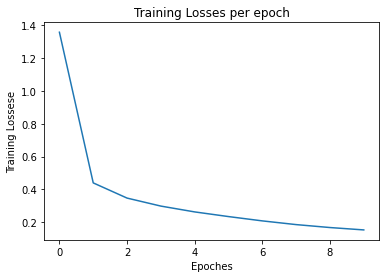

In [13]:
plt.plot(training_loss_hist)
plt.xlabel("Epoches")
plt.ylabel("Training Lossese")
plt.title("Training Losses per epoch");

Plot the training loss (and validation loss/accuracy, if recorded).

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
## YOUR CODE HERE ##
correct_predictions = 0
total_predictions = 0
    
for i, data in enumerate(test_loader):
    inputs,labels = data# data = [inputs, labels]
        # To cpu or cuda
    inputs,labels = inputs.to(device),labels.to(device)
    outputs = my_model(inputs)
        
    #compute the accuracy 
    _,pred = torch.max(outputs.data,1)
    correct_predictions += (pred == labels).sum().item()
    total_predictions += labels.size(0)
    model_accuracy = (correct_predictions*100)/total_predictions
print("model accuracy on test data:{}".format(model_accuracy))

model accuracy on test data:95.37


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
## YOUR CODE HERE ##
#### note: I add momentum to my optimizer 
optimizer1 = torch.optim.SGD(my_model.parameters(),lr = 1e-2, momentum = 0.9)


In [16]:
n_epochs = 10
training_loss_hist = []

for epoch in range(n_epochs):
    #train the model
    my_model.train()
    
    train_loss = 0.0 # set train loss to zero
    train_correct = 0.0 # set correct predictionsto zero 
    
    for i, data in enumerate(training_loader):
        inputs,labels = data# data = [inputs, labels]
        # To cpu or cuda
        inputs,labels = inputs.to(device),labels.to(device)
        # set the optimizer gradients to zero
        optimizer.zero_grad()
        # forward passing
        outputs = my_model(inputs)
        #computing the loss 
        loss =criterion(outputs,labels)
        #backward passing
        loss.backward()
        #updating the parameters
        optimizer1.step()
        
        #updating the loss value
        train_loss +=loss.item()
        
        #compute the accuracy 
        _,pred = torch.max(outputs.data,1)
        train_correct += (pred == labels).sum().item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(training_loader):.2f}% training loss: {train_loss/len(training_loader):.5f}')
    
    training_loss_hist.append(train_loss/len(training_loader))

Epoch 1 training accuracy: 60.28% training loss: 0.18618
Epoch 2 training accuracy: 61.53% training loss: 0.12315
Epoch 3 training accuracy: 62.01% training loss: 0.09806
Epoch 4 training accuracy: 62.34% training loss: 0.08036
Epoch 5 training accuracy: 62.55% training loss: 0.06920
Epoch 6 training accuracy: 62.74% training loss: 0.05987
Epoch 7 training accuracy: 62.86% training loss: 0.05060
Epoch 8 training accuracy: 63.08% training loss: 0.04233
Epoch 9 training accuracy: 63.14% training loss: 0.03995
Epoch 10 training accuracy: 63.25% training loss: 0.03426


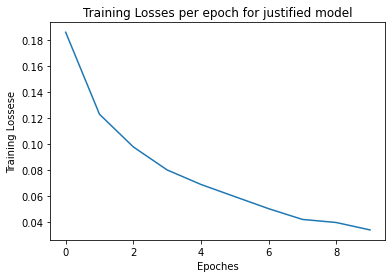

In [17]:
plt.plot(training_loss_hist)
plt.xlabel("Epoches")
plt.ylabel("Training Lossese")
plt.title("Training Losses per epoch for justified model");

In [18]:
###testing new model accuracy
correct_predictions = 0
total_predictions = 0
    
for i, data in enumerate(test_loader):
    inputs,labels = data# data = [inputs, labels]
        # To cpu or cuda
    inputs,labels = inputs.to(device),labels.to(device)
    outputs = my_model(inputs)
        
    #compute the accuracy 
    _,pred = torch.max(outputs.data,1)
    correct_predictions += (pred == labels).sum().item()
    total_predictions += labels.size(0)
    model_accuracy = (correct_predictions*100)/total_predictions
print("model accuracy on test data:{}".format(model_accuracy))

model accuracy on test data:96.98


## Saving your model
Using `torch.save`, save your model for future loading.

In [19]:
## YOUR CODE HERE ##
torch.save(my_model,"mnist_handwritten.pth")